# A Report on Financial Derivative (Avalanche-USD)

# Computational Methods for Finance- Individual Coursework

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D
import os

In [2]:
initial_data = yf.download("AVAX-USD", start="2021-03-01", end="2022-03-01")

[*********************100%***********************]  1 of 1 completed


downloaded the data and saved it as a pandas DataFrame

In [3]:
initial_data.head() # the head method() returns a specified number of rows from the top.

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-02-28,25.821205,25.909754,22.301069,23.823219,23.823219,156409576
2021-03-01,23.877151,27.769768,23.697975,27.403772,27.403772,248201636
2021-03-02,27.420732,31.742144,26.015213,27.135157,27.135157,563934379
2021-03-03,27.148203,29.230932,26.619446,27.272078,27.272078,305240058
2021-03-04,27.266541,28.733620,24.280476,25.805176,25.805176,290696777


In [4]:
initial_data.tail() # the tail method() returns a specified number of rows from last

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-02-24,73.669731,79.316010,64.831413,76.523964,76.523964,3097306165
2022-02-25,76.537056,81.859871,72.947037,80.832619,80.832619,1884195969
2022-02-26,80.847862,84.872398,78.503708,81.879707,81.879707,1419135253
2022-02-27,81.793427,82.264816,73.751022,74.991188,74.991188,1577126485
2022-02-28,74.977539,85.394432,72.127090,84.339233,84.339233,1906636314


In [7]:
initial_data['Adj Close']

Date
2021-02-28    23.823219
2021-03-01    27.403772
2021-03-02    27.135157
2021-03-03    27.272078
2021-03-04    25.805176
                ...    
2022-02-24    76.523964
2022-02-25    80.832619
2022-02-26    81.879707
2022-02-27    74.991188
2022-02-28    84.339233
Name: Adj Close, Length: 366, dtype: float64

Set the Adj Closed data as a new DataFrame we will use.

In [8]:
ADJ =  initial_data['Adj Close']

array([<AxesSubplot:xlabel='Date'>], dtype=object)

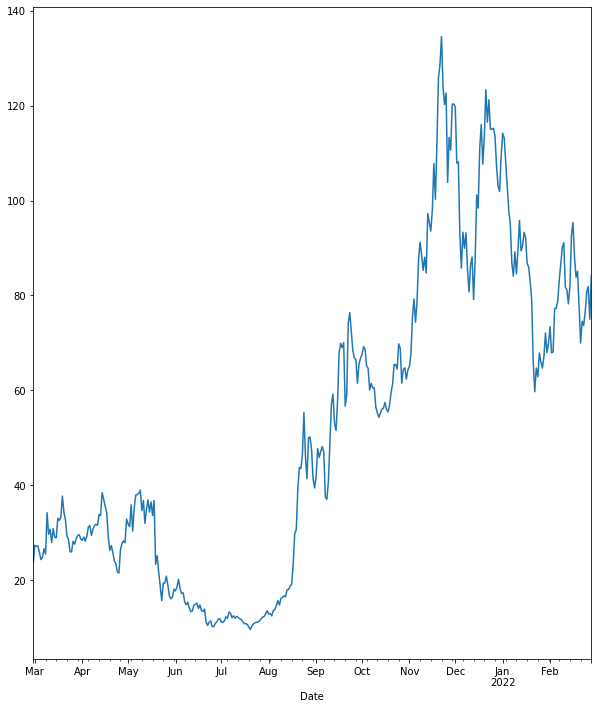

In [10]:
ADJ.plot(figsize=(10, 12), subplots=True)  #plotting Adj close price

###### Summary Statistics

In [14]:
ADJ.describe().round(2)

count    366.00
mean      52.03
std       33.29
min        9.65
25%       23.51
50%       44.85
75%       78.74
max      134.53
Name: Adj Close, dtype: float64

###### Log Return of Avalanche (AVAX-USD)

There are multiple options to calculate the changes in a time series over time, including absolute differences, percentage changes, and logarithmic (log) returns.
For the coursework, logarithmic (log) returns used.

In [15]:
rets = np.log(ADJ / ADJ.shift(1)) # Compute logarthmic return using the Adj Close Price, Period=1, frequency= none
rets.head().round(4)

Date
2021-02-28       NaN
2021-03-01    0.1400
2021-03-02   -0.0099
2021-03-03    0.0050
2021-03-04   -0.0553
Name: Adj Close, dtype: float64

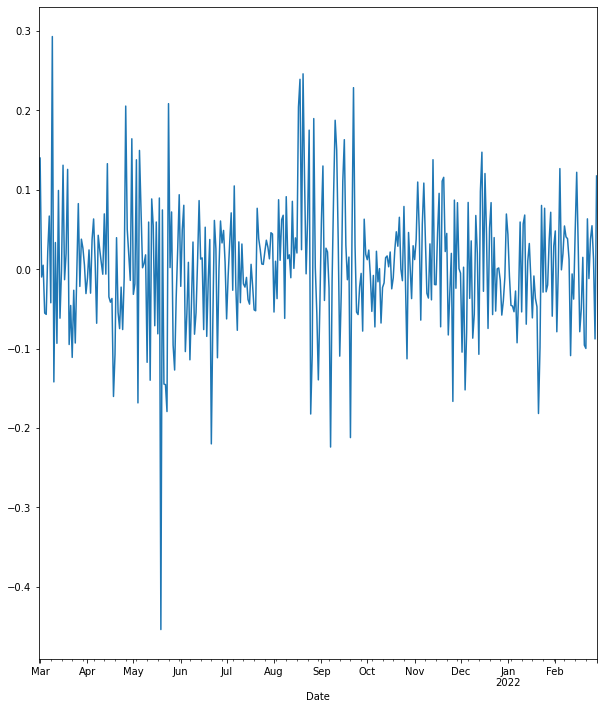

In [40]:
rets.plot(figsize=(10, 12));

In [42]:
ADJ.diff()

Date
2021-02-28         NaN
2021-03-01    3.580553
2021-03-02   -0.268616
2021-03-03    0.136921
2021-03-04   -1.466902
                ...   
2022-02-24    2.825333
2022-02-25    4.308655
2022-02-26    1.047089
2022-02-27   -6.888519
2022-02-28    9.348045
Name: Adj Close, Length: 366, dtype: float64

In [39]:
C = ADJ.pct_change().round(4)
print('Daily percentage change in value', round(C,4))

Daily percentage change in value Date
2021-02-28       NaN
2021-03-01    0.1503
2021-03-02   -0.0098
2021-03-03    0.0050
2021-03-04   -0.0538
               ...  
2022-02-24    0.0383
2022-02-25    0.0563
2022-02-26    0.0130
2022-02-27   -0.0841
2022-02-28    0.1247
Name: Adj Close, Length: 366, dtype: float64


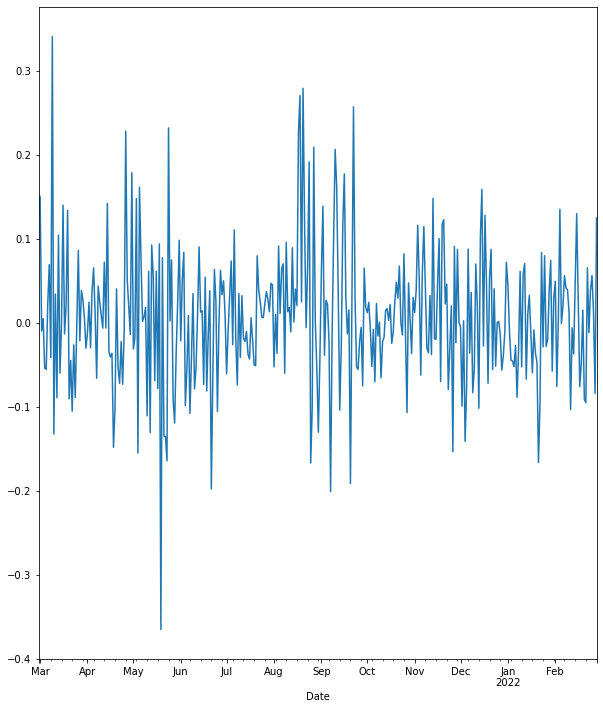

In [41]:
C.plot(figsize=(10, 12));

###### Compute Volatility using the pandas rolling standard deviation function

In [20]:
vol = np.sqrt(365) * rets.std()
print('The annualised volatility is', round(vol*100,2), '%')

The annualised volatility is 155.08 %


### BINOMIAL TREE (CRR Tree)

###### Data Input

In [23]:
S0 = 86.74               # spot stock price is Adj Close Price of 1st March 2022
K = 88.11                # strike (assumed)
T = 0.5                  # maturity of option in 6 months
r = 0.02326              # risk free rate taken as 2 year US Treasury Yield ,(source Bloomberg dated 28th March 2022)
vol = 1.55               # diffusion coefficient or volatility of the return of Avalanche is the same annually.
N = 3                    # number of periods or number of time steps  
payoff = "put"           # payoff 

Step 1: Create the binomial price tree

The tree of prices is produced by working forward from valuation date to expiration.

At each step, it is assumed that the underlying instrument will move up or down by a specific factor ( u or d) per step of the tree (where, by definition, u ≥ 1 and 0 < d ≤ 1 ). So, if S is the current price, then in the next period the price will either be S_up = S * u or S_down = S * d.

In [24]:
dT = float(T) / N                           # Delta t, time represented in each period.
u = np.exp(vol * np.sqrt(dT))               # up factor
d = 1.0 / u                                 # down factor

In [25]:
S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [26]:
S

array([[ 86.74      , 163.31812545, 307.50299863, 578.98101576],
       [  0.        ,  46.06854003,  86.74      , 163.31812545],
       [  0.        ,   0.        ,  24.46749343,  46.06854003],
       [  0.        ,   0.        ,   0.        ,  12.99494698]])

In [27]:
a = np.exp(r * dT)    # risk free compound return as discount element
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability
p

0.3497528329852662

Step 2: Find option value at each final node

In [28]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)
V

array([[ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , 42.04145997],
       [ 0.        ,  0.        ,  0.        , 75.11505302]])

Step 3: Find option value at earlier nodes

###### European Option

In [29]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V

array([[38.84920744, 17.63873749,  0.        ,  0.        ],
       [ 0.        , 50.48988819, 27.23156764,  0.        ],
       [ 0.        ,  0.        , 63.30159469, 42.04145997],
       [ 0.        ,  0.        ,  0.        , 75.11505302]])

In [30]:
print('European ' + payoff, str( V[0,0]))

European put 38.84920744123585


### Black-Scholes Model

###### European Options

Non- Divident Paying Option

In [43]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price is Adj Close Price of 1st March 2022
    #K: strike/execise price (assumed)
    #T: time to maturity which is taken as 6 months
    #r: risk free rate taken as 2 year US Treasury Yield ,(source Bloomberg dated 28th March 2022)
    #vol: diffusion coefficient or volatility of the return of Avalanche is the same annually
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [44]:
euro_option_bs(86.74, 88.11, 0.5, 0.02326, 1.55, 'call')

36.008748383493725

In [45]:
euro_option_bs(86.74, 88.11, 0.5, 0.02326, 1.55, 'put')

36.359964793171414

### Delta

In [1]:
def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) 
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [47]:
d = delta(86.74, 88.11, 0.5, 0.02326, 0, 1.55, 'call')
print('The value of Delta is', d.round(4),'.','If the stock price increase/decrease 1 dollar, then the value of the option will increase/decrease $', d.round(4), '.')

The value of Delta is 0.7069 . If the stock price increase/decrease 1 dollar, then the value of the option will increase/decrease $ 0.7069 .


In [48]:
d = delta(86.74, 88.11, 0.5, 0.02326, 0, 1.55, 'put')
print('The value of Delta is', d.round(4),'.','If the stock price increase/decrease 1 dollar, then the value of the option will increase/decrease $', d.round(4), '.')

The value of Delta is -0.2931 . If the stock price increase/decrease 1 dollar, then the value of the option will increase/decrease $ -0.2931 .


In [57]:
S = np.linspace(30,130,51) #Stock Price range set from $30 to $130 (point 51)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Call [i] = delta(S[i], 88.11, 0.5, 0.02326, 0, 1.55, 'call')
    Delta_Put [i] = delta(S[i], 88.11, 0.5, 0.02326, 0, 1.55, 'put')

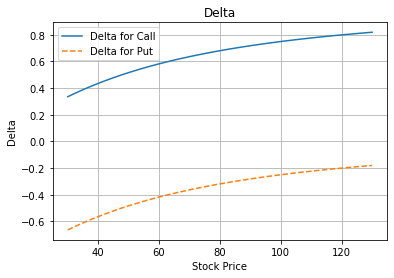

In [58]:
fig = plt.figure()
plt.plot(S, Delta_Call, '-')
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for Call','Delta for Put'])

###### 3D Surface of Delta

In [59]:
S = np.linspace(30, 130, 51) #Stock Price range set from $30 to $130 (point 51)
T = np.linspace(0.02, 0.5, 51) # Time to expiry set from 1 week to 6 months (point 51)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 88.11, T[i], 0.02326, 0, 1.55, 'put')

C:\Users\PRIYAN~1.KOT\AppData\Local\Temp/ipykernel_11084/602569748.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


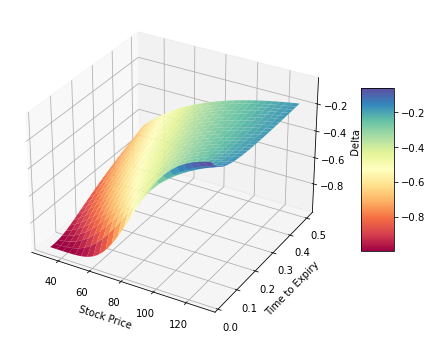

In [60]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.Spectral, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);

###### Gamma

Gamma, Γ, measures the rate of change in the delta with respect to changes in the underlying price. Gamma is the second derivative of the value function with respect to the underlying price.

In [61]:
def gamma(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma

In [62]:
g = gamma(86.74, 88.11, 0.5, 0.02326, 0, 1.55, 'put') 
print('The value of Gamma is', g.round(4),'.','If the stock price increase/decrease 1 dollar, then the delta will increase/decrease by' , g.round(4), '.')

The value of Gamma is 0.0036 . If the stock price increase/decrease 1 dollar, then the delta will increase/decrease by 0.0036 .


###### 2D Surface of Gamma

In [63]:
S = np.linspace(30,130,51) Stock Price range set from $30 to $130 (point 51)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i], 88.11, 0.5, 0.02326, 0, 1.55, 'put')

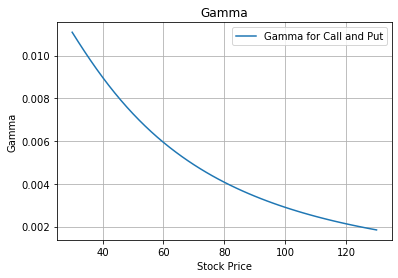

In [64]:
fig = plt.figure()
plt.plot(S, Gamma, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Call and Put']) #as call and Put formulae is same and will give same result

###### 3D Surface of Gamma

In [71]:
S = np.linspace(30, 130, 51) #Stock Price range set from $30 to $130 (point 51)
T = np.linspace(0.02, 0.5, 51) # Time to expiry set from 1 week(0.02) to 6 months(0.5) (point 51)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j],88.11 , T[i], 0.02326, 0, 1.55, 'put')

C:\Users\PRIYAN~1.KOT\AppData\Local\Temp/ipykernel_11084/3080651869.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


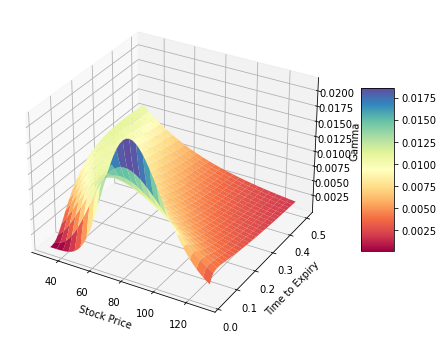

In [70]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Gamma, rstride=2, cstride=2, cmap=plt.cm.Spectral, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);

###### Speed

Speed measures the rate of change in Gamma with respect to changes in the underlying price.

In [116]:
def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed

In [117]:
s = speed(86.74, 88.11, 0.5, 0.02326, 0, 1.55, 'put')
print('The value of Speed is', s.round(4),'.','If the stock price increase/decrease 1 dollar, then the gamma will increase/decrease by' , s.round(4), '.')

The value of Speed is -0.0 . If the stock price increase/decrease 1 dollar, then the gamma will increase/decrease by -0.0 .


In [119]:
S = np.linspace(30,130,51)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i], 88.11, 0.5, 0.02326, 0, 1.55, 'put')

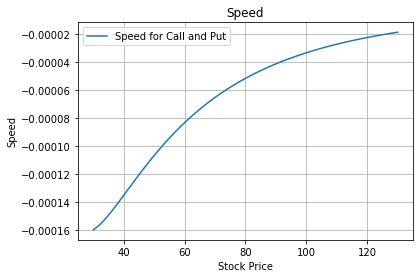

In [120]:
fig = plt.figure()
plt.plot(S, Speed, '-')
plt.grid()
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for Call and Put'])

###### 3D Surface of Speed

In [121]:
S = np.linspace(30, 130, 51) #Stock Price range set from $30 to $130 (point 51)
T = np.linspace(0.02, 0.5, 51) # Time to expiry set from 1 week to 6 months (point 51)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j],88.11, 0.5, 0.02326, 0, 1.55,'put')

C:\Users\PRIYAN~1.KOT\AppData\Local\Temp/ipykernel_11084/3074572599.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


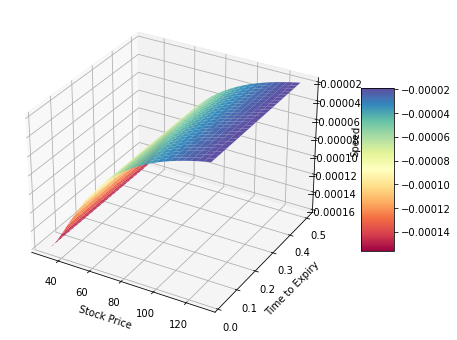

In [122]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Speed, rstride=2, cstride=2, cmap=plt.cm.Spectral, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);

###### Theta

Theta, 𝜃, measures the sensitivity of the value of the derivative to the passage of time (see Option time value): the "time decay".

In [72]:
def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta

In [85]:
t = theta(86.74, 88.11, 0.5, 0.02326, 0, 1.55, 'call')
print('The value of Theta is', t.round(4),'.','decrease in 1/365 day will decrease option value to decrease by dollar' , t.round(4)*1/365, '.')

The value of Theta is 33.2932 . decrease in 1/365 day will decrease option value to decrease by dollar 0.09121424657534247 .


In [86]:
t = theta(86.74, 88.11, 0.5, 0.02326, 0, 1.55, 'put')
print('The value of Theta is', t.round(4),'.','decrease in 1/365 day will decrease option value to decrease by dollar' , t.round(4)*1/365, '.')

The value of Theta is 34.1417 . decrease in 1/365 day will decrease option value to decrease by dollar 0.09353890410958904 .


###### 3D Surface of Theta

In [87]:
S = np.linspace(30, 130, 51) #Stock Price range set from $30 to $130 (point 51)
T = np.linspace(0.02, 0.5, 51) # Time to expiry set from 1 week to 6 months (point 51)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j], 88.11, T[i], 0.02326, 0, 1.55, 'put')

C:\Users\PRIYAN~1.KOT\AppData\Local\Temp/ipykernel_11084/2273786227.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


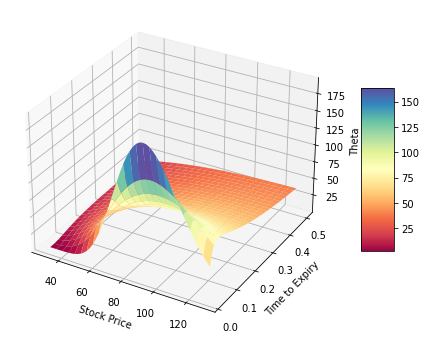

In [88]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Theta, rstride=2, cstride=2, cmap=plt.cm.Spectral, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

###### Rho

Rho, 𝜌, measures sensitivity to the interest rate: it is the derivative of the option value with respect to the risk free interest rate (for the relevant outstanding term)

In [97]:
def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho

In [109]:
r = rho(86.74, 88.11, 0.5, 0.02326, 0, 1.55, 'put')
print('The value of rho is', r.round(4),'.','For 1 percent increase or decrease in interest rate, the stock price increase/decrease by dollar', r.round(4)/100, '.')

The value of rho is -30.8922 . For 1 percent increase or decrease in interest rate, the stock price increase/decrease by dollar -0.308922 .


###### 3D Surface of Rho

In [110]:
S = np.linspace(30, 130, 51)
T = np.linspace(0.02, 0.5, 51)
Rho = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Rho[i,j] = rho(S[j], 105, T[i], 0.04, 0.02, 0.3, 'put')

C:\Users\PRIYAN~1.KOT\AppData\Local\Temp/ipykernel_11084/3430112224.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


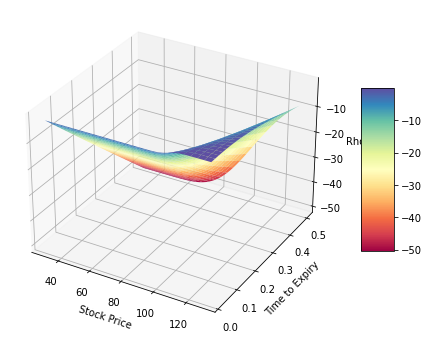

In [111]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Rho, rstride=2, cstride=2, cmap=plt.cm.Spectral, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);

###### Vega

Vega measures sensitivity to volatility. 

In [90]:
def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega

In [104]:
v = vega(86.74, 88.11, 0.5, 0.02326, 0, 1.55, 'put')
print('The value of Vega is', v.round(4),'.','For a 1 percent increase or decrease in volatility, the stock price increase/decrease by dollar', v.round(4)/100, '.')

The value of Vega is 21.0997 . For a 1 percent increase or decrease in volatility, the stock price increase/decrease by dollar 0.210997 .


###### 2D Surface of Vega

In [114]:
vol = np.linspace(0.8,1.6,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(86.74, 88.11, 0.5, 0.02326, 0, vol[i], 'call')

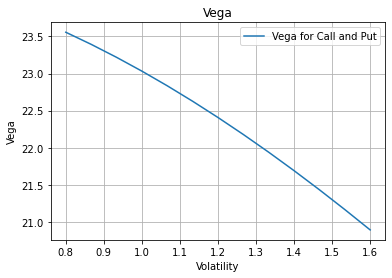

In [115]:
fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for Call and Put'])

###### 3D Surface of Vega

In [95]:
S = np.linspace(30, 130, 51) #Stock Price range set from $30 to $130 (point 51)
T = np.linspace(0.02, 0.5, 51) # Time to expiry set from 1 week to 6 months (point 51)
Vega = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Vega[i,j] = vega(S[j], 88.11, T[i], 0.02326, 0, 1.55, 'put')
        


C:\Users\PRIYAN~1.KOT\AppData\Local\Temp/ipykernel_11084/265311310.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


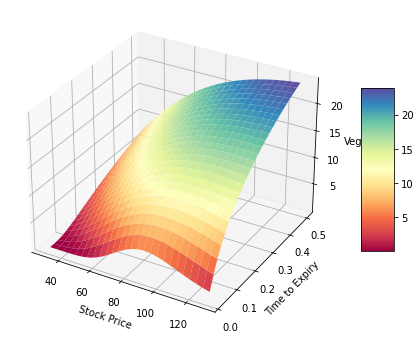

In [96]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Vega, rstride=2, cstride=2, cmap=plt.cm.Spectral, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);